In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime

1) Log file is loaded

In [58]:
file = open("log.txt", "r") 
lines = file.readlines()
for l in range(3): print(lines[l][:-1])

156.15.13.173 [01/Jan/2018:11:13:49 +0100] "GET AddProduct.html HTTP/1.0" 200 2356
176.247.135.49 [01/Jan/2018:11:18:07 +0100] "GET Shop.html HTTP/1.0" 200 7466
176.247.135.49 [01/Jan/2018:11:19:05 +0100] "GET AddProduct.html HTTP/1.0" 200 2356


2) Cass "Request" parses and keeps data of a single requests. Complete the TODO, where a given "line" (string) should be parsed in order to dervie the ip of the host making the request, time of the request (in seconds), and target page (name).

In [59]:
class Request:
    def __init__(self, line):
        splitted_line = line.split(' ')
        ip_retrieved = splitted_line[0]
        time_date_retrieved = splitted_line[1]
        time_retrieved = time_date_retrieved.split(':')
        total_seconds = int(time_retrieved[1])*60*60 + int(time_retrieved[2])*60 + int(time_retrieved[3]) - 1
        
        self.ip = ip_retrieved
        self.time = total_seconds
        self.page = splitted_line[4]
        
    def __repr__(self):
        return self.ip + "     " +  str(datetime.timedelta(seconds=self.time)) + " -> " + self.page


3) Each line of log.txt is parsed and the Request objects are added to the list

In [60]:
reqs = [Request(line) for line in lines]
for l in range(10): print(reqs[l]) 


156.15.13.173     11:13:48 -> AddProduct.html
176.247.135.49     11:18:06 -> Shop.html
176.247.135.49     11:19:04 -> AddProduct.html
176.247.135.49     11:29:04 -> Summary.html
69.84.30.199     11:43:58 -> Shop.html
69.84.30.199     11:45:15 -> AddProduct.html
57.116.45.120     11:46:44 -> AddProduct.html
69.84.30.199     11:50:35 -> Summary.html
69.84.30.199     11:52:37 -> Payment.html
26.19.183.202     11:53:10 -> AddProduct.html


# Exercise

Your task is to analyze the log file. You should indentify the users and sessions. Then, compute the following: <br>
3.1) the number of sessions (should be 1000 :) ), <br>
3.2) the number of users, <br>
3.3) the average number of sessions per one user <br>
3.4) use the distribution plot to visualize the sessions' lengths (minutes);  <br>
3.5) use the distribution plot to visualize the sessions' lengths (the number of requests) <br>
3.6) use the distribution plot to visualize sessions' starting times (hours). <br>
3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page,  <br>
3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page, <br>
3.9) for each page plot the average time the user stayed on this page <br>
3.10) print the fist 10 sessions (paths). <br>

You may find the following classes helpful and data.

In [61]:
class Session:
    def __init__(self):
        self.startTime = 0
        self.stopTime = 0
        self.requests = []
        
    def __repr__(self):
        print("SESSION")
        print(self.startTime)
        print(self.stopTime)
        STR = ""
        for r in self.requests:
            print(r)
            STR += ("  " + r.page + "    " + str(datetime.timedelta(seconds=r.time)) + "\n")
        return STR

class Computer:
    def __init__(self):
        self.ip = []
        self.sessions = []
    def __repr__(self):
        return self.ip

PAGES = ["Shop.html", "AddProduct.html", "Summary.html", "Payment.html","About.html", "Contact.html"]

LINKS = [[1, 4],
         [2,4],
         [3],
         [],
         [1,5],
         []]

In [62]:
# 3.2) compute number of users
users = {}
for req in reqs:
    if req.ip not in users:
        users[req.ip] = [req]
    else:
        users[req.ip].append(req)
        
print("Number of users: ", len(users))

threshold = 600
sessions = [[]]
curr_session = 0
for user, value_user in users.items():
  
  # 3.1) compute number of sessions
  timestamp = value_user[0].time
  
  for request in value_user:

    if request.time - timestamp < threshold:
      sessions[curr_session].append(request)
    else:
      timestamp = request.time
      sessions.append([request])
      curr_session += 1

print("Number of sessions: ", len(sessions))

Number of users:  391
Number of sessions:  941


In [63]:
# 3.3) the average number of sessions per one user
print("Average number of sessions per user: ", len(sessions) / len(users))

Average number of sessions per user:  2.4066496163682864


[]

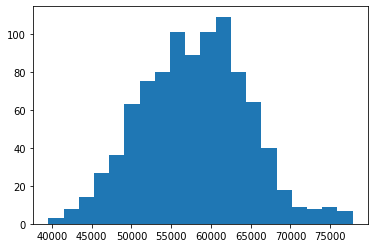

In [64]:
# 3.4)  use the distribution plot to visualize the sessions' lengths (minutes)
sessions_lengths_minutes = []
for session in sessions:
    #print(session[0].time, session[-1].time)
    sessions_lengths_minutes.append(session[-1].time - session[0].time / 60)


plt.hist(sessions_lengths_minutes, 20)
plt.plot()


[]

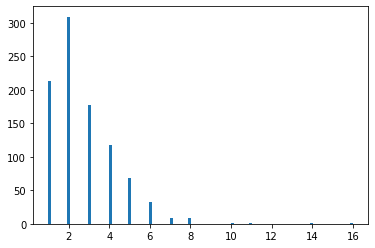

In [65]:
#3.5) use the distribution plot to visualize the sessions' lengths (the number of requests) 
sessions_lengths = []
for session in sessions:
    sessions_lengths.append(len(session))

plt.hist(sessions_lengths, 100)
plt.plot()



[]

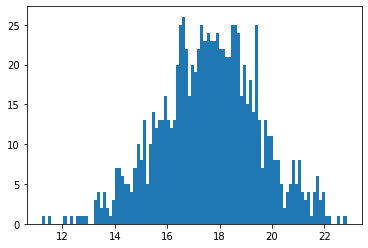

In [66]:
#3.6) use the distribution plot to visualize sessions' starting times (hours). <br>
sessions_starting_times = []
for session in sessions:
    sessions_starting_times.append(session[0].time / 3600)

plt.hist(sessions_starting_times, 100)
plt.plot()


In [67]:
#3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page,  <br>
sessions_entry_points = {}
for session in sessions:
    if session[0].page not in sessions_entry_points:
        sessions_entry_points[session[0].page] = 0
    else:
        sessions_entry_points[session[0].page] += 1

print(sessions_entry_points)
print("ANSWER: Shop.html")

{'AddProduct.html': 219, 'Shop.html': 415, 'Summary.html': 68, 'Payment.html': 90, 'Contact.html': 129, 'About.html': 14}
ANSWER: Shop.html


In [68]:
#3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page, <br>
sessions_departure_points = {}
for session in sessions:
    if session[-1].page not in sessions_departure_points:
        sessions_departure_points[session[-1].page] = 0
    else:
        sessions_departure_points[session[-1].page] += 1

print(sessions_departure_points)
print("ANSWER: AddProduct.html")

{'AddProduct.html': 268, 'Payment.html': 164, 'Summary.html': 137, 'About.html': 216, 'Contact.html': 119, 'Shop.html': 31}
ANSWER: AddProduct.html


{'AddProduct.html': 44341945, 'Shop.html': 42116323, 'Summary.html': 20854854, 'Payment.html': 16571546, 'About.html': 20532798, 'Contact.html': 12307514}
{'AddProduct.html': 61077.059228650134, 'Shop.html': 61038.14927536232, 'Summary.html': 61518.74336283186, 'Payment.html': 61834.12686567164, 'About.html': 61109.517857142855, 'Contact.html': 61537.57}


<BarContainer object of 6 artists>

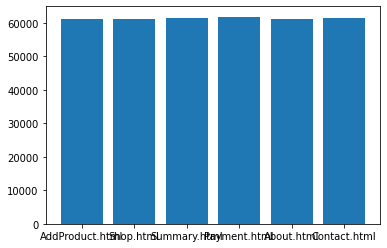

In [69]:
pages = {}
avg_time_pages = {}
#3.9) for each page plot the average time the user stayed on this page <br>
for el in reqs:
    if el.page in pages:
        pages[el.page].append(el)
        avg_time_pages[el.page] += el.time
    else:
        pages[el.page] = [el]
        avg_time_pages[el.page] = el.time

print(avg_time_pages)
for key, value in avg_time_pages.items():
    avg_time_pages[key] /= len(pages[key])

print(avg_time_pages)
plt.bar(range(len(avg_time_pages)), list(avg_time_pages.values()), tick_label=list(avg_time_pages.keys()))

In [70]:
#3.10) print the first 10 sessions (paths). <br>
for session in sessions[0:10]:
    # print(session)
    for page in session:
        print(page.page + "-> ", end= " ")
    print("\n")

AddProduct.html->  

Shop.html->  AddProduct.html->  

Summary.html->  Payment.html->  

AddProduct.html->  About.html->  Shop.html->  AddProduct.html->  

Summary.html->  

Shop.html->  AddProduct.html->  Summary.html->  

Payment.html->  Shop.html->  AddProduct.html->  Summary.html->  Payment.html->  

Shop.html->  AddProduct.html->  Summary.html->  Payment.html->  

Shop.html->  AddProduct.html->  AddProduct.html->  Summary.html->  Payment.html->  

AddProduct.html->  Summary.html->  Payment.html->  

